In [2]:
# 1. Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import skew
from scipy.stats import boxcox


In [5]:
# Load the dataset
df = pd.read_csv('academic-performance.csv')
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [12]:
df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [14]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].mean(), inplace=True)

print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64


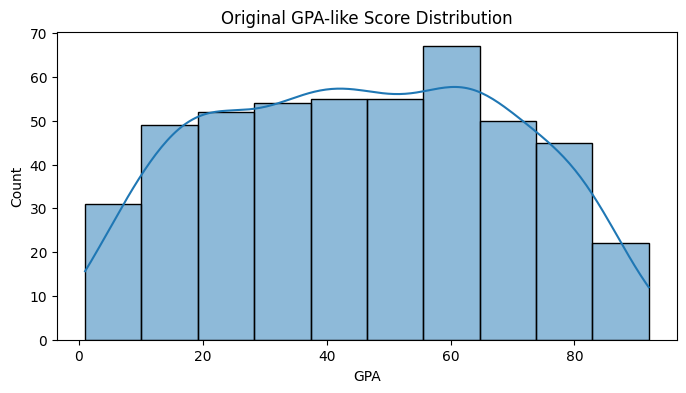

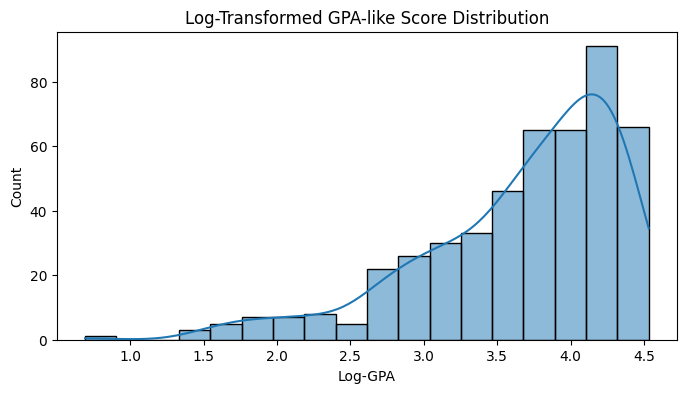

In [21]:
# 2. Create GPA-like column (average of activity indicators)
df['GPA'] = df[['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']].mean(axis=1)

# 3. Plot original GPA distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['GPA'], kde=True)
plt.title("Original GPA-like Score Distribution")
plt.xlabel("GPA")
plt.show()

# 4. Apply log transformation (log1p to handle zeros)
df['GPA_log'] = np.log1p(df['GPA'])

# 5. Plot log-transformed GPA
plt.figure(figsize=(8, 4))
sns.histplot(df['GPA_log'], kde=True)
plt.title("Log-Transformed GPA-like Score Distribution")
plt.xlabel("Log-GPA")
plt.show()

In [22]:
# 3. Identify skewness in numeric columns and handle it

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

print("Skewness before transformation:")
for col in numeric_cols:
    skewness = skew(df[col])
    print(f"{col}: {skewness:.2f}")

# Fix highly skewed columns using log1p if skewness > 1 or < -1
for col in numeric_cols:
    if abs(skew(df[col])) > 1:
        df[col + '_fixed'] = np.log1p(df[col])

# Plot an example if fixed
if 'GPA_fixed' in df.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df['GPA_fixed'], kde=True)
    plt.title("GPA After Skewness Fix")
    plt.show()


Skewness before transformation:
raisedhands: 0.03
VisITedResources: -0.34
AnnouncementsView: 0.40
Discussion: 0.36
GPA: -0.01
GPA_log: -1.19
